## 📍📍 Credit Card Lead Prediction

---

### Perform EDA


In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

## Reading the dataset

In [2]:
# importing dataset
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [4]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [5]:
train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [6]:
train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [7]:
train.nunique()

ID                     245725
Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance    135292
Is_Active                   2
Is_Lead                     2
dtype: int64

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


In [9]:
test.nunique()

ID                     105312
Gender                      2
Age                        62
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance     78315
Is_Active                   2
dtype: int64

In [10]:
train.Is_Lead.value_counts(normalize=True)*100

0    76.279174
1    23.720826
Name: Is_Lead, dtype: float64

* 76% belong to class 0
* 24% belong to class 1

##  Data Cleaning and Exploratory Data Analysis

### Missing data



In [11]:
train.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [12]:
test.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
dtype: object

In [13]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [14]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [15]:
train.isnull().sum(axis=1).value_counts()

0    216400
1     29325
dtype: int64

In [16]:
test.isnull().sum(axis=1).value_counts()

0    92790
1    12522
dtype: int64

### Handling missing values
* For train data 67% of customers have no credit product. We will therefore use mode 'NO' to replace the missing values.
* For test data 66% of customers do not have any credit product therefore we shall use mode 'NO' to fill missing values.

In [17]:
train['Credit_Product'] = train['Credit_Product'].astype('category')
test['Credit_Product'] = test['Credit_Product'].astype('category')

In [18]:
# Convert to categorical
train[['Credit_Product']].dtypes
test[['Credit_Product']].dtypes

Credit_Product    category
dtype: object

In [19]:
train['Credit_Product'].fillna('No', inplace=True)

In [20]:

train.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [21]:
test['Credit_Product'].fillna('No', inplace=True)

In [22]:
test.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

### Idenitify Variables and Typecasting`(changing variable types accordingly)`.

In [23]:
train.dtypes

ID                       object
Gender                   object
Age                       int64
Region_Code              object
Occupation               object
Channel_Code             object
Vintage                   int64
Credit_Product         category
Avg_Account_Balance       int64
Is_Active                object
Is_Lead                   int64
dtype: object

In [24]:
test.dtypes

ID                       object
Gender                   object
Age                       int64
Region_Code              object
Occupation               object
Channel_Code             object
Vintage                   int64
Credit_Product         category
Avg_Account_Balance       int64
Is_Active                object
dtype: object

**Summary:**

*    **Age**, **Vintage** and **Avg_Account_Balance** are all numbers hence okay as **Integer data type**
*    **ID**, **Gender**, **Region_Code**, **Occupation**, **Channel_Code** and **Is_Active** should be categorical variables.We will type cast accordingly.


In [25]:
train['ID'] = train['ID'].astype('category')
train['Gender'] = train['Gender'].astype('category')
train['Region_Code'] = train['Region_Code'].astype('category')
train['Occupation'] = train['Occupation'].astype('category')
train['Channel_Code'] = train['Channel_Code'].astype('category')
train['Is_Active'] = train['Is_Active'].astype('category')
train.dtypes

ID                     category
Gender                 category
Age                       int64
Region_Code            category
Occupation             category
Channel_Code           category
Vintage                   int64
Credit_Product         category
Avg_Account_Balance       int64
Is_Active              category
Is_Lead                   int64
dtype: object

In [26]:
test['ID'] = test['ID'].astype('category')
test['Gender'] = test['Gender'].astype('category')
test['Region_Code'] = test['Region_Code'].astype('category')
test['Occupation'] = test['Occupation'].astype('category')
test['Channel_Code'] = test['Channel_Code'].astype('category')
test['Is_Active'] = test['Is_Active'].astype('category')
test.dtypes

ID                     category
Gender                 category
Age                       int64
Region_Code            category
Occupation             category
Channel_Code           category
Vintage                   int64
Credit_Product         category
Avg_Account_Balance       int64
Is_Active              category
dtype: object

# 📍 Univariate Analysis 

## **`1.Categorical`**

In [27]:
train.select_dtypes(exclude=['int64','float64','Int64']).dtypes
test.select_dtypes(exclude=['int64','float64','Int64']).dtypes

ID                category
Gender            category
Region_Code       category
Occupation        category
Channel_Code      category
Credit_Product    category
Is_Active         category
dtype: object

In [28]:
# Grouping the various variables. 
Customerdetails = ['Gender','Region_Code','Occupation']
BankDetails = ['Channel_Code','Credit_Product','Is_Active']

In [29]:
# Custom function for easy visualisation of Categorical Variables
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index, color = 'lightgreen')
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

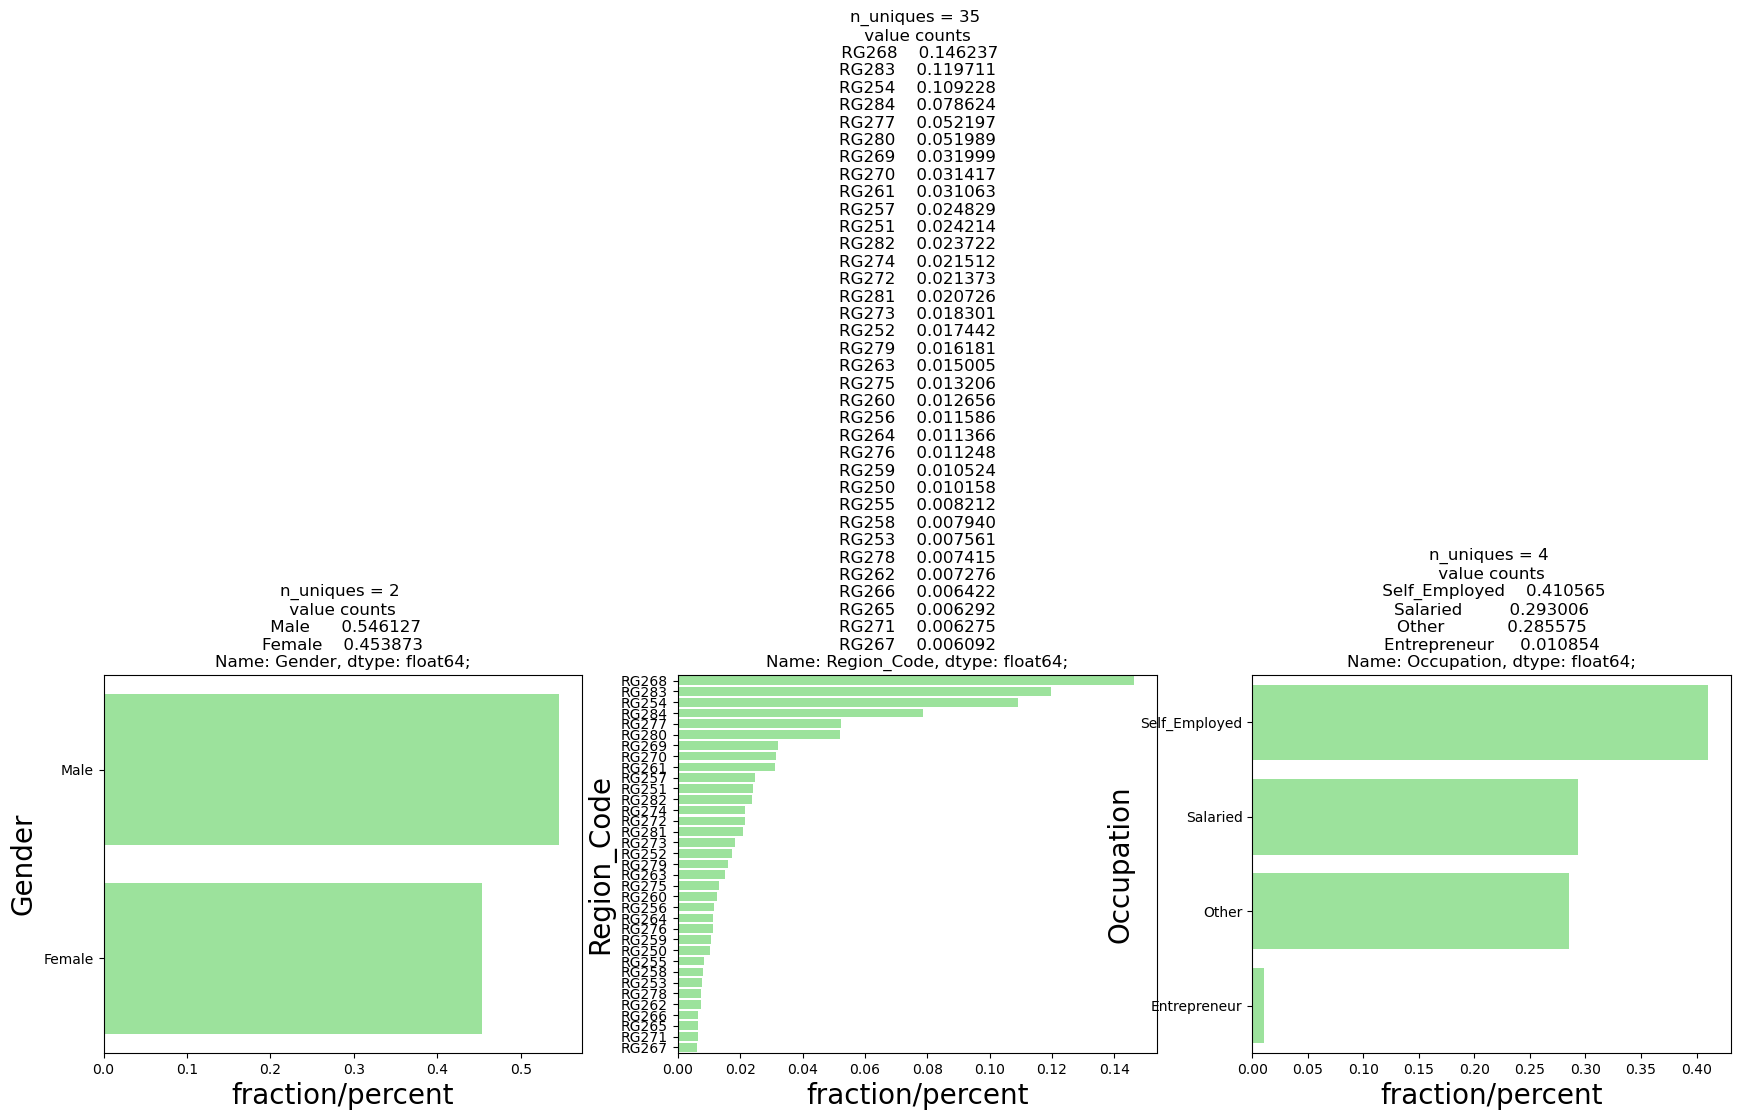

In [30]:
UVA_category(train,Customerdetails )

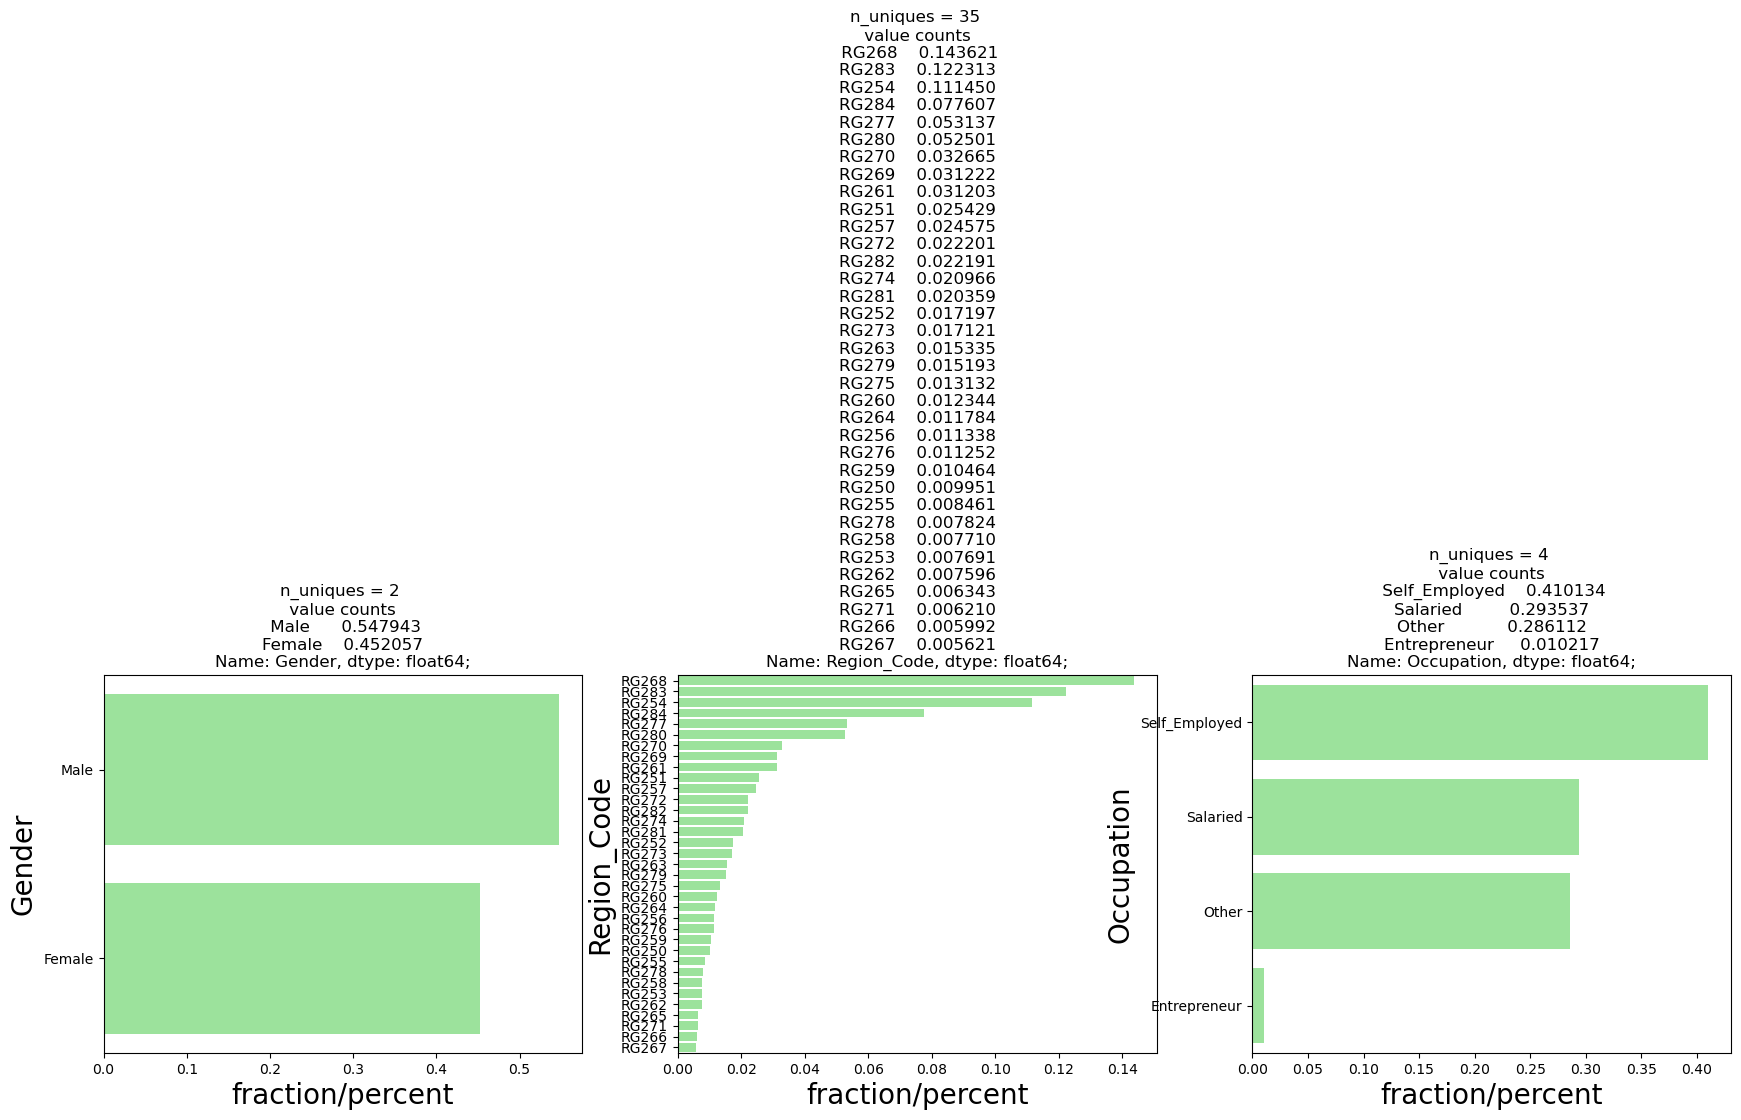

In [31]:
UVA_category(test,Customerdetails )

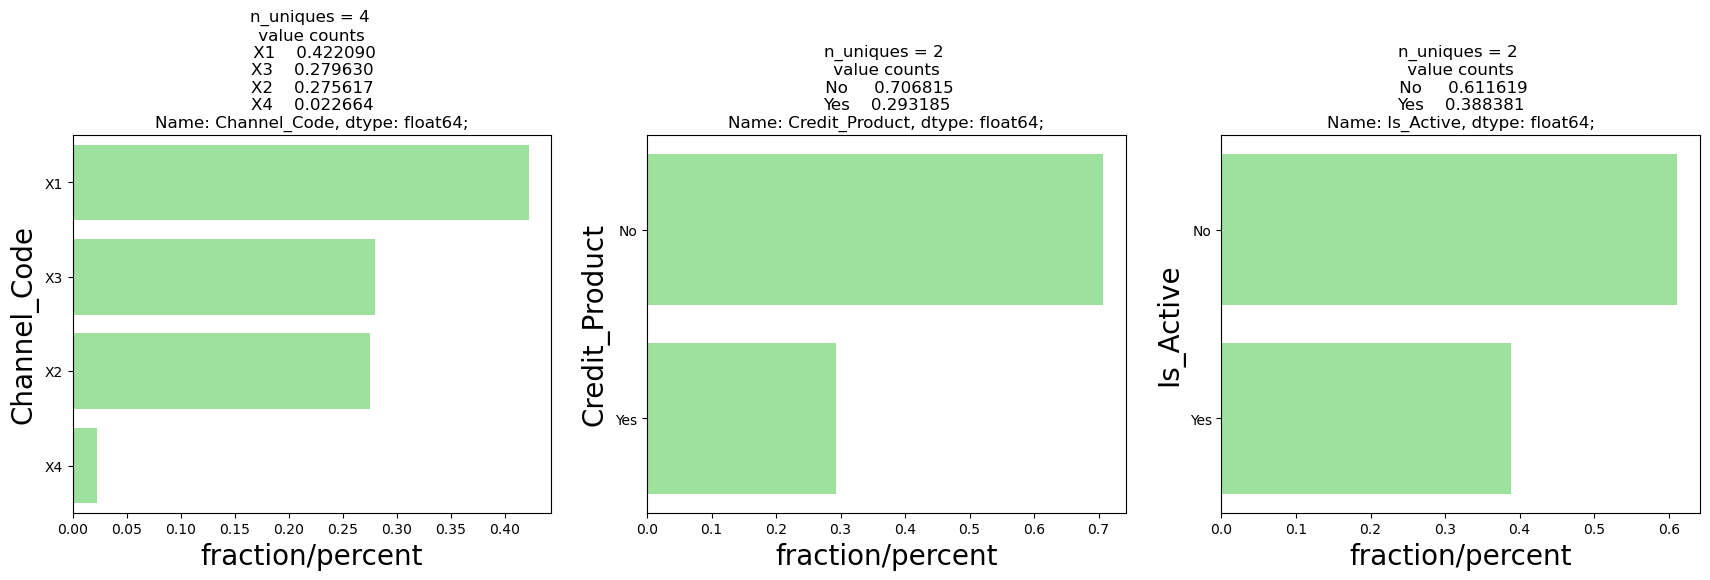

In [32]:
UVA_category(train,BankDetails )

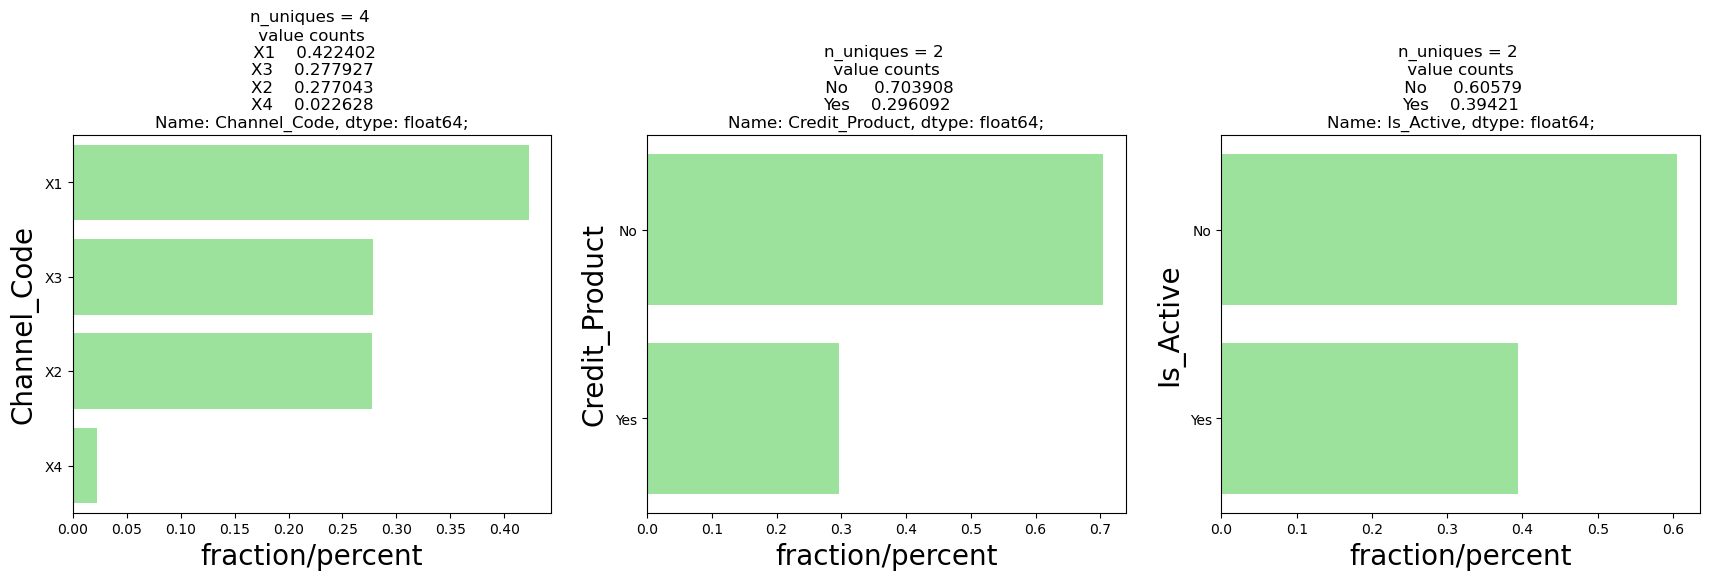

In [33]:
UVA_category(test,BankDetails )

**Summary**

* **Things to investigate further down:**
 *Channel_code relationship to credit products held.

## **`1.Numerical`** 

In [34]:
# Interger data types
train.select_dtypes(include=['int64','Int64']).dtypes

Age                    int64
Vintage                int64
Avg_Account_Balance    int64
Is_Lead                int64
dtype: object

In [35]:
# Grouping the various variables. 
General_Custdetails = ['Age','Vintage']
Bank_Custdetails = ['Avg_Account_Balance','Is_Lead']


In [36]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True,color = 'green')
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

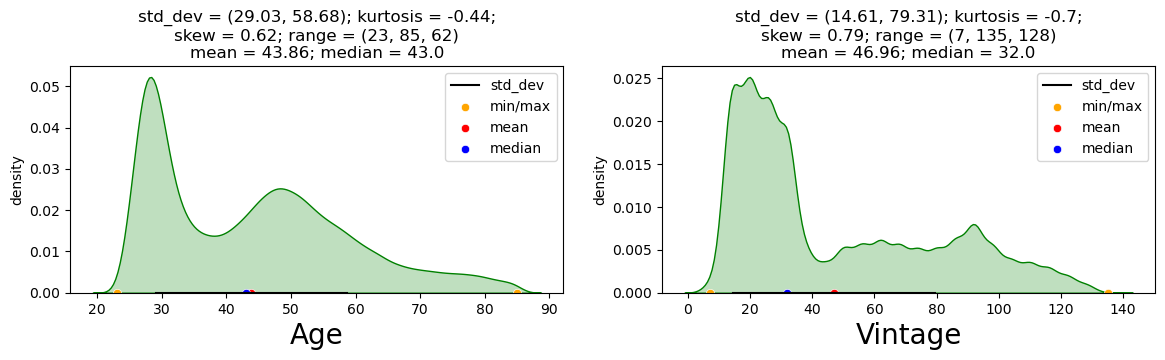

In [37]:
UVA_numeric(train,General_Custdetails)

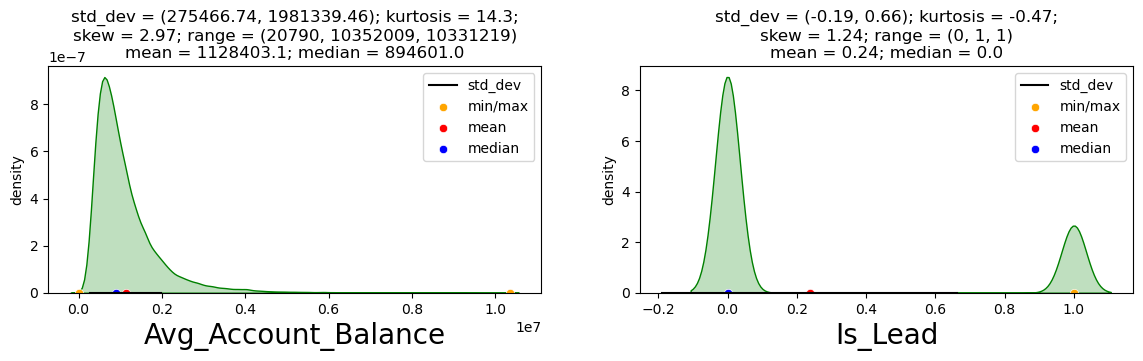

In [38]:
UVA_numeric(train,Bank_Custdetails)

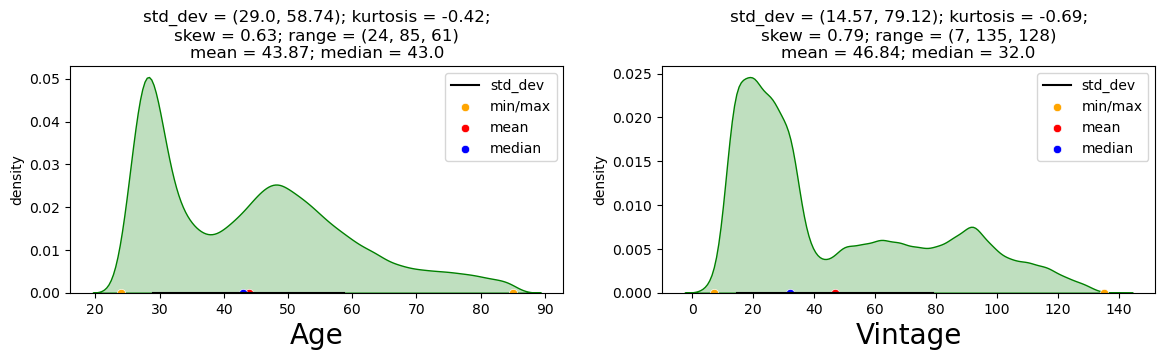

In [39]:
UVA_numeric(test,General_Custdetails)

**Summary:**
*    **Age**:
    *    skewness 0.62 : customer age is **negatively skewed **
    *    **kurtosis = -0.44**; slightly  playtkurtic.Extreme values and Outliers are very unlikely.
*    **Vintage**:
    *    skewness 1.24 : vintage is **negatively skewed **
    *    **kurtosis = -0.7**; slightly  playtkurtic.Extreme values and Outliers are very unlikely. 
*    **Avg_Account_Balance**:
    *    skewness 2.97 : Balance is **negatively skewed **
    *    **kurtosis = 14.3**; Leptokurtic.Extreme values and Outliers are very likely.   
        

**Things to Investigate Further down the road:**
*    The outliers present in Avg_Account_Balance   .

## **`4.Outliers`** 

**From analysis above we have Kurtosis and skewness values that may be an indictor of outlier presence.**
* Avg_Account_Balance


In [40]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

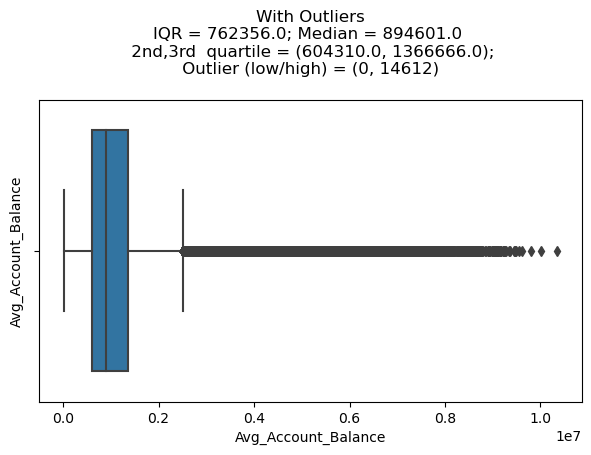

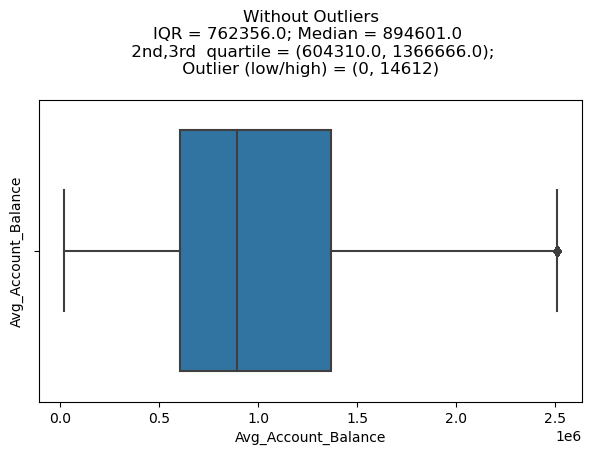

In [41]:
UVA_outlier(train, ['Avg_Account_Balance'])
UVA_outlier(train, ['Avg_Account_Balance'], include_outlier=False)

# 📍 Bivariate Analysis
* Numerical-Numerical:
* Categorical-Categorical: 
* Categorical-Numerical: 

In [42]:
# isolating numerical datatypes
numerical = train.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

Age                    int64
Vintage                int64
Avg_Account_Balance    int64
Is_Lead                int64
dtype: object

In [43]:
# calculating correlation
correlation = numerical.corr()
correlation

,Age,Vintage,Avg_Account_Balance,Is_Lead
Age,1.000000,0.631242,0.145232,0.230814
Vintage,0.631242,1.000000,0.167433,0.279642
Avg_Account_Balance,0.145232,0.167433,1.000000,0.053370
Is_Lead,0.230814,0.279642,0.053370,1.000000


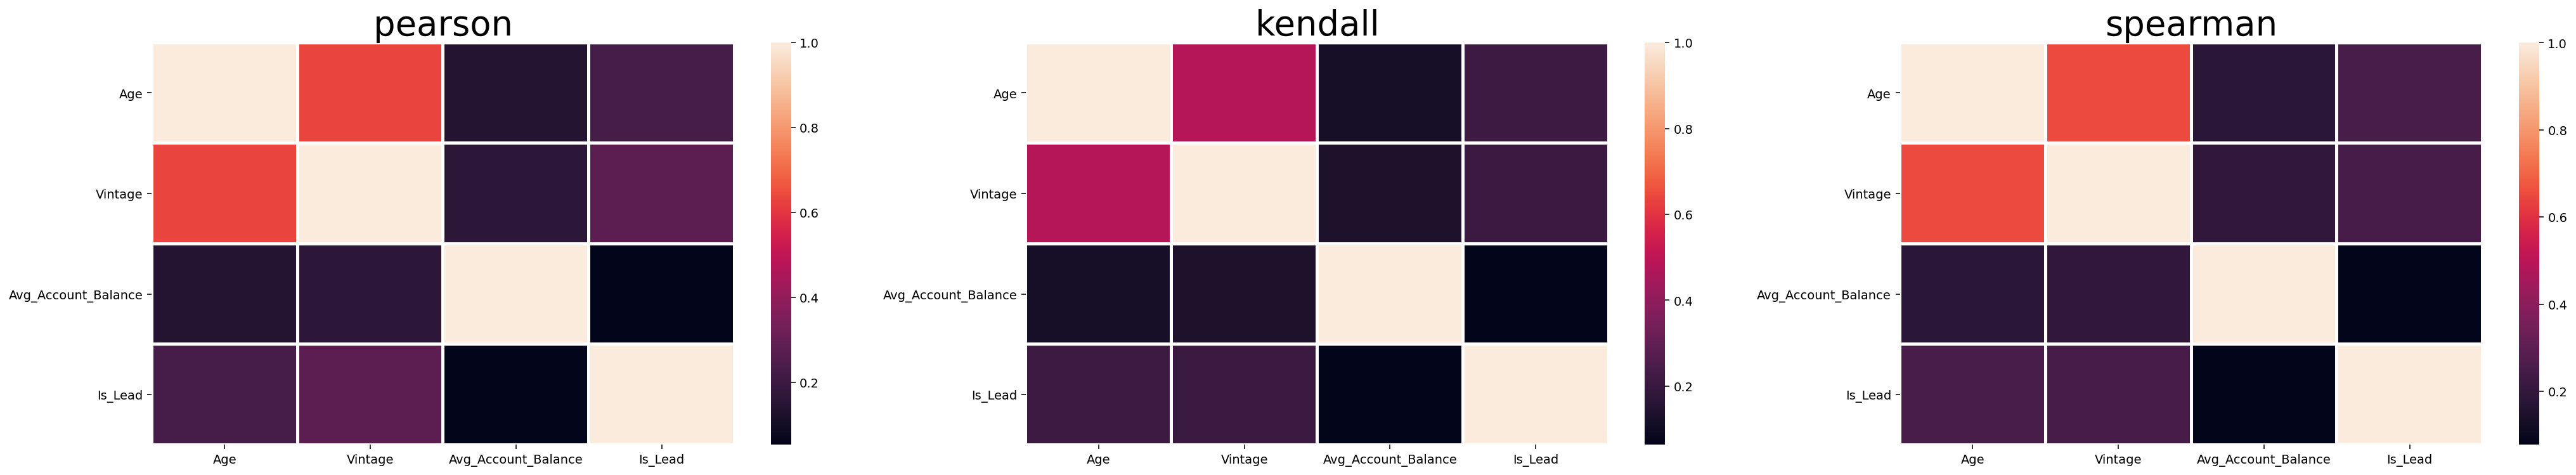

In [44]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=28)

* Pearson, Kendall and Spearman correlation have similar patterns.
*  Major correlation lies between:
    * Customer_Age and Vintage
    * Lead type our target variable shows no correlation
   

## **`Categorical-Categorical`** 

In [45]:
train.select_dtypes(exclude=['int64','float64','Int64']).dtypes

ID                category
Gender            category
Region_Code       category
Occupation        category
Channel_Code      category
Credit_Product    category
Is_Active         category
dtype: object

In [46]:
def BVA_categorical_plot(data, tar, cat):
  '''
  take data and two categorical variables,
  calculates the chi2 significance between the two variables 
  and prints the result with countplot
  '''
  #isolating the variables
  data = data[[cat,tar]][:]

  #forming a crosstab
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  #checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  #plotting grouped plot
  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))
 #plotting percent stacked bar plot
  pal = ["red", "orange","yellow","green","blue","Indigo","violet","fuschia"]
  ax= table.apply(lambda r: r/r.sum()*100, axis=1)
  ax_1 = ax.plot.bar(figsize=(10,10),stacked=True, rot=0, colors=pal)
  display(ax)

  plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1.0), title=str(ax_1))

  #plt.xlabel('Gender')
  #plt.ylabel('Count')

  for rec in ax_1.patches:
      height = rec.get_height()
      ax_1.text(rec.get_x() + rec.get_width() / 2, 
                rec.get_y() + height / 2,
                "{:.0f}%".format(height),
                ha='center', 
                va='bottom')

  plt.show()

AttributeError: 'Rectangle' object has no property 'colors'

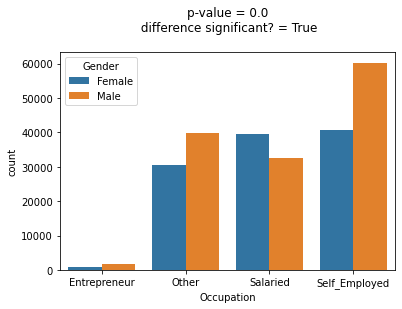

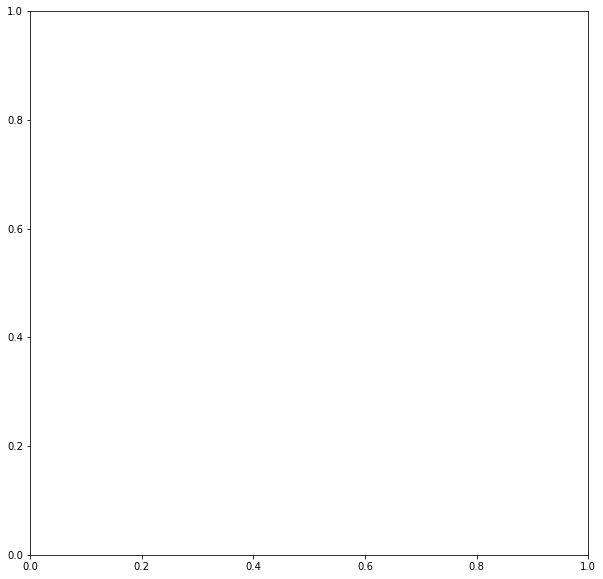

In [47]:
BVA_categorical_plot(train, 'Gender', 'Occupation')

In [ ]:
BVA_categorical_plot(train, 'Credit_Product', 'Occupation')

In [ ]:
BVA_categorical_plot(train, 'Credit_Product', 'Is_Active')


## **`Continuous-Categorical`** 

In [48]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [49]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [50]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.std()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  

In [51]:
train.dtypes

ID                     category
Gender                 category
Age                       int64
Region_Code            category
Occupation             category
Channel_Code           category
Vintage                   int64
Credit_Product         category
Avg_Account_Balance       int64
Is_Active              category
Is_Lead                   int64
dtype: object

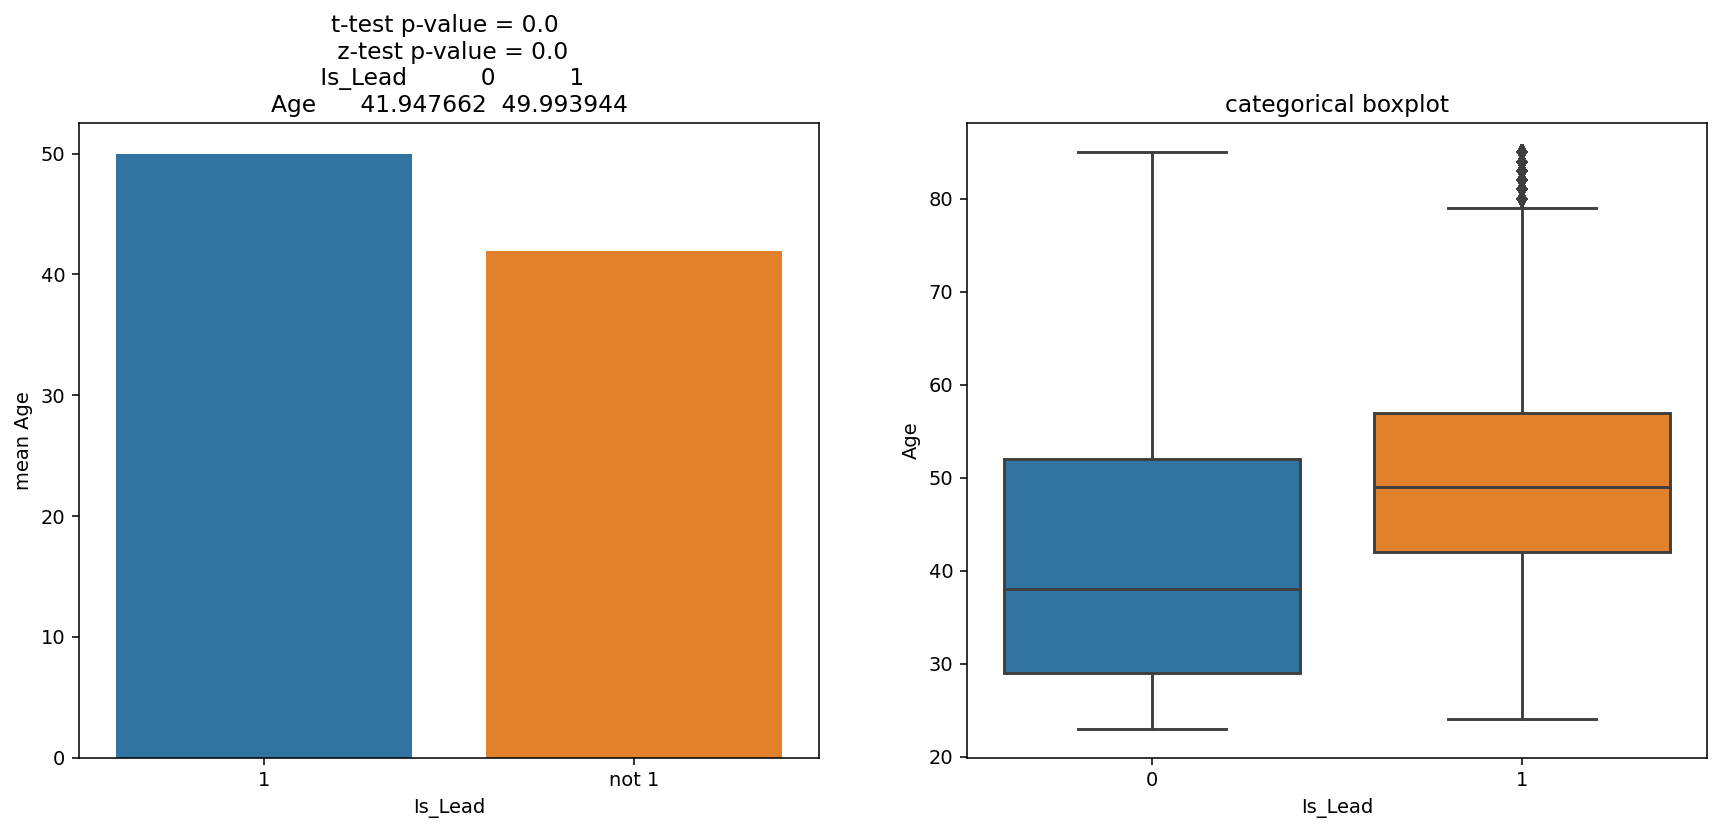

In [52]:
Bivariate_cont_cat(train, 'Age', 'Is_Lead', 1)

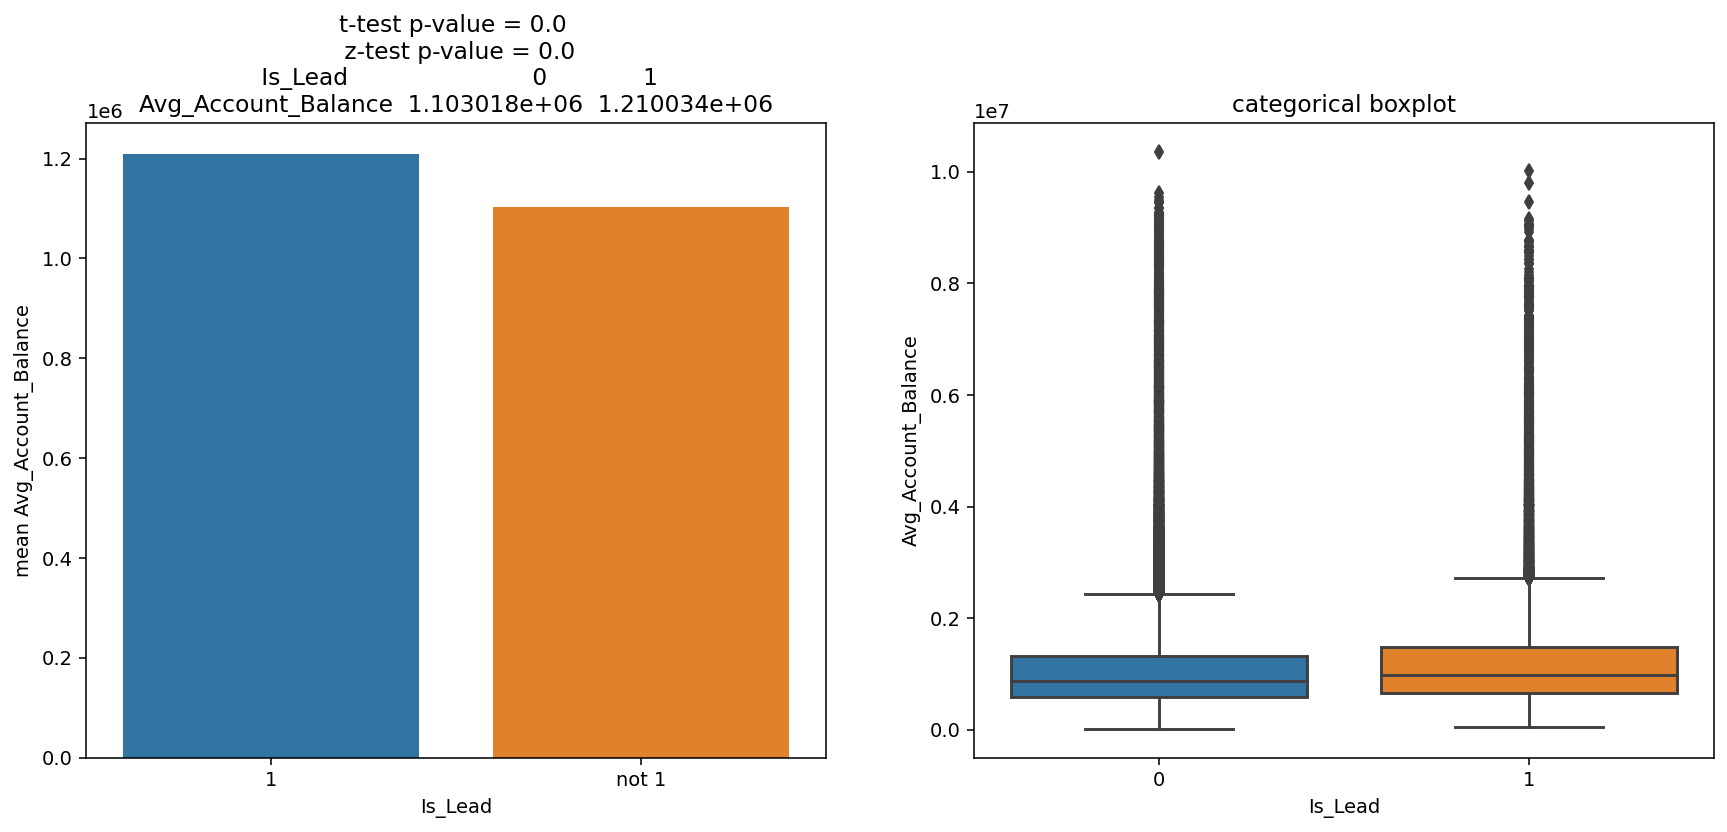

In [53]:
Bivariate_cont_cat(train, 'Avg_Account_Balance', 'Is_Lead', 1)

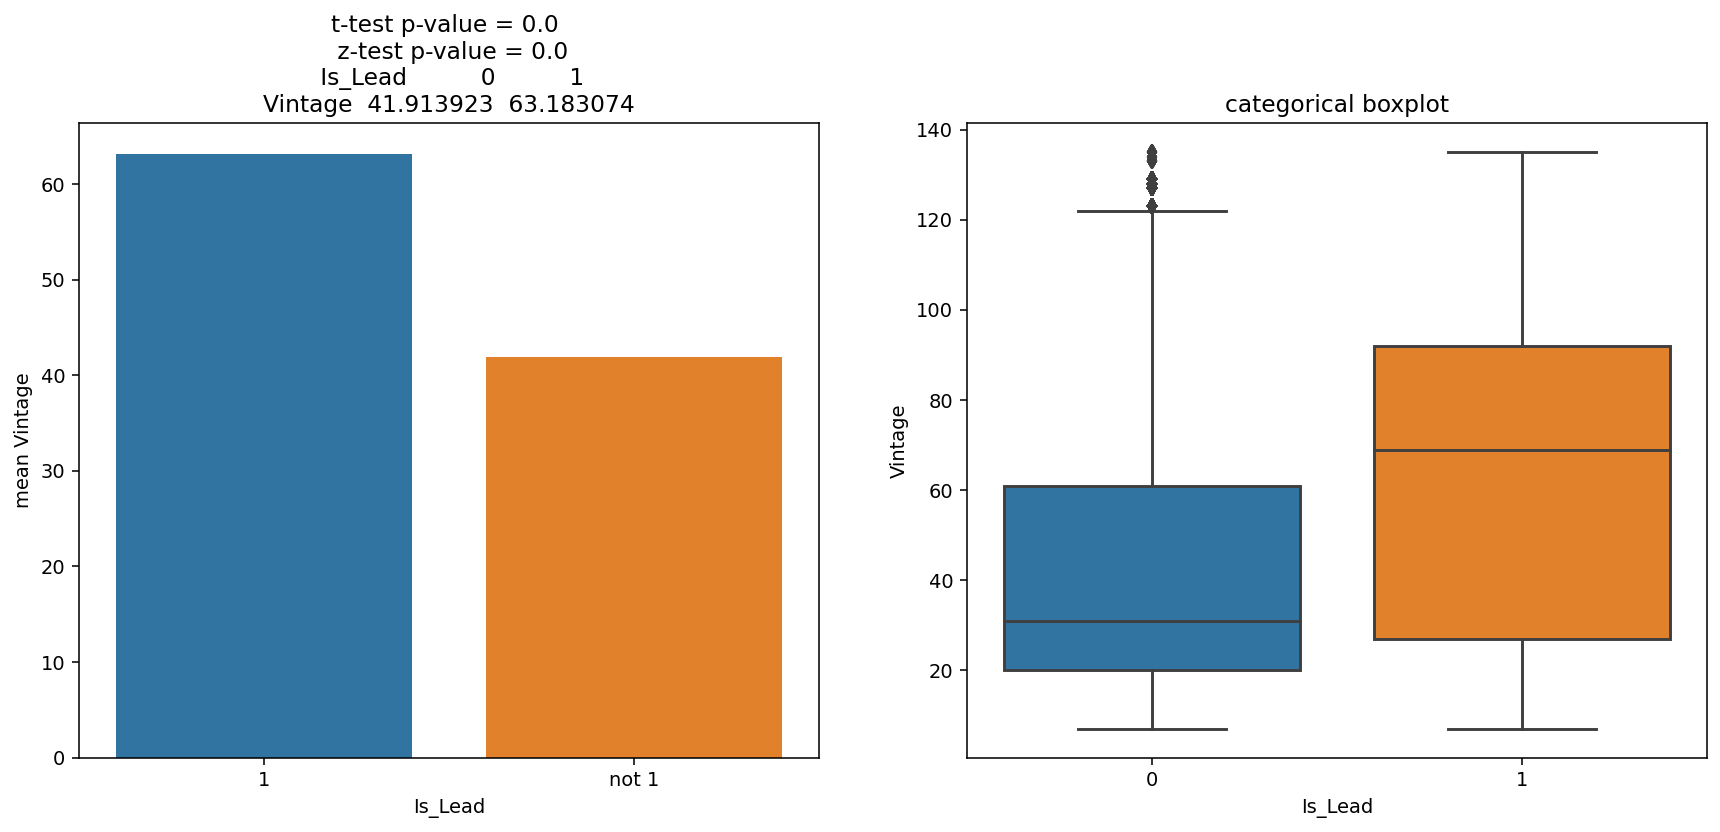

In [54]:
Bivariate_cont_cat(train, 'Vintage', 'Is_Lead', 1)

# 📍 Multivariate Analysis

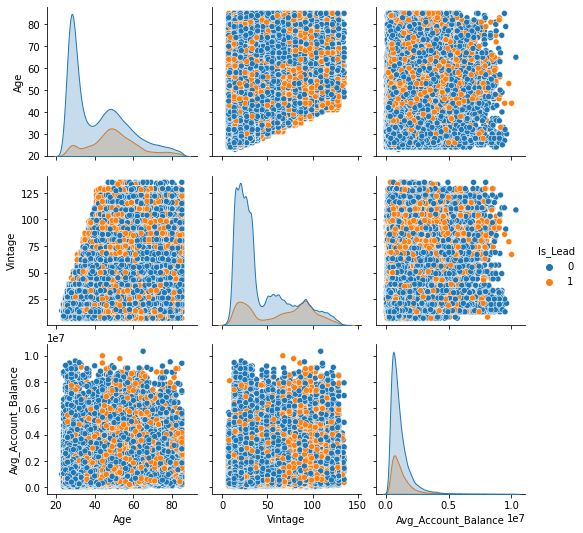

In [55]:
sns.pairplot(data=train[['Age','Vintage','Avg_Account_Balance','Is_Lead']],hue='Is_Lead')

### One hot encoder
* Creating dummy variables for categorical data 

In [56]:
# train.dtypes
train.dtypes

ID                     category
Gender                 category
Age                       int64
Region_Code            category
Occupation             category
Channel_Code           category
Vintage                   int64
Credit_Product         category
Avg_Account_Balance       int64
Is_Active              category
Is_Lead                   int64
dtype: object

In [57]:
test.dtypes

ID                     category
Gender                 category
Age                       int64
Region_Code            category
Occupation             category
Channel_Code           category
Vintage                   int64
Credit_Product         category
Avg_Account_Balance       int64
Is_Active              category
dtype: object

In [58]:
#train = pd.get_dummies(train, columns = ['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active'])

In [59]:
# Label encode categorical variables.
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
mappings = []

# Desired label orders for categorical columns.

Channel_Code_order = ['X3', 'X2', 'X1', 'X4']
creditproduct_order = ['Yes', 'No']
Is_Active_order = ['Yes', 'No']
Region_Code_order = ['RG268','RG283','RG254','RG284','RG277','RG280','RG269','RG270','RG261','RG257','RG251','RG282','RG274','RG272','RG281','RG273','RG252','RG279','RG263','RG275','RG260','RG256','RG264','RG276','RG259','RG250','RG255','RG258','RG253','RG278','RG262','RG266','RG265','RG271','RG267']

# using cat.codes for order, one hot for high cardinality and weak case of cardinality.

def ordered_labels(train, col, order):
    train[col] = train[col].astype('category')
    train[col] = train[col].cat.reorder_categories(order, ordered=True)
    train[col] = train[col].cat.codes.astype(int)

# Use dummy variables for occupation
train = pd.concat([train, pd.get_dummies(train['Occupation'])],axis=1).drop('Occupation',axis=1)

# Use ordered cat.codes for days, months, and education
ordered_labels(train, 'Channel_Code', Channel_Code_order)
ordered_labels(train, 'Credit_Product', creditproduct_order)
ordered_labels(train, 'Is_Active', Is_Active_order)
ordered_labels(train, 'Region_Code', Region_Code_order)

# Same label encoding for rest since low cardinality
for i, col in enumerate(train):
    if train[col].dtype == 'object':
        train[col] = label_encoder.fit_transform(np.array(X_df[col].astype(str)).reshape((-1,)))
        mappings.append(dict(zip(label_encoder.classes_, range(1, len(label_encoder.classes_)+1))))

train.head()

,ID,Gender,Age,Region_Code,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Entrepreneur,Other,Salaried,Self_Employed
0,NNVBBKZB,Female,73,0,0,43,1,1045696,1,0,0,1,0,0
1,IDD62UNG,Female,30,4,2,32,1,581988,1,0,0,0,1,0
2,HD3DSEMC,Female,56,0,0,26,1,1484315,0,0,0,0,0,1
3,BF3NC7KV,Male,34,7,2,19,1,470454,1,0,0,0,1,0
4,TEASRWXV,Female,30,11,2,33,1,886787,1,0,0,0,1,0


In [60]:
# Label encode categorical variables.

label_encoder = LabelEncoder()
mappings = []

# Desired label orders for categorical columns.

Channel_Code_order = ['X3', 'X2', 'X1', 'X4']
creditproduct_order = ['Yes', 'No']
Is_Active_order = ['Yes', 'No']
Region_Code_order = ['RG268','RG283','RG254','RG284','RG277','RG280','RG269','RG270','RG261','RG257','RG251','RG282','RG274','RG272','RG281','RG273','RG252','RG279','RG263','RG275','RG260','RG256','RG264','RG276','RG259','RG250','RG255','RG258','RG253','RG278','RG262','RG266','RG265','RG271','RG267']

# using cat.codes for order, one hot for high cardinality and weak case of cardinality.

def ordered_labels(test, col, order):
    test[col] = test[col].astype('category')
    test[col] = test[col].cat.reorder_categories(order, ordered=True)
    test[col] = test[col].cat.codes.astype(int)

# Use dummy variables for occupation
test = pd.concat([test, pd.get_dummies(test['Occupation'])],axis=1).drop('Occupation',axis=1)

# Use ordered cat.codes for days, months, and education
ordered_labels(test, 'Channel_Code', Channel_Code_order)
ordered_labels(test, 'Credit_Product', creditproduct_order)
ordered_labels(test, 'Is_Active', Is_Active_order)
ordered_labels(test, 'Region_Code', Region_Code_order)

# Same label encoding for rest since low cardinality
for i, col in enumerate(test):
    if test[col].dtype == 'object':
        test[col] = label_encoder.fit_transform(np.array(X_df[col].astype(str)).reshape((-1,)))
        mappings.append(dict(zip(label_encoder.classes_, range(1, len(label_encoder.classes_)+1))))

test.head()

,ID,Gender,Age,Region_Code,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Entrepreneur,Other,Salaried,Self_Employed
0,VBENBARO,Male,29,2,2,25,0,742366,1,0,1,0,0
1,CCMEWNKY,Male,43,0,1,49,1,925537,1,0,1,0,0
2,VK3KGA9M,Male,31,7,2,14,1,215949,1,0,0,1,0
3,TT8RPZVC,Male,29,13,2,33,1,868070,1,0,1,0,0
4,SHQZEYTZ,Female,29,7,2,19,1,657087,1,0,1,0,0


In [61]:
train = pd.get_dummies(train, columns = ['Gender'])
test = pd.get_dummies(test, columns = ['Gender'])

In [62]:
train.dtypes

ID                     category
Age                       int64
Region_Code               int32
Channel_Code              int32
Vintage                   int64
Credit_Product            int32
Avg_Account_Balance       int64
Is_Active                 int32
Is_Lead                   int64
Entrepreneur              uint8
Other                     uint8
Salaried                  uint8
Self_Employed             uint8
Gender_Female             uint8
Gender_Male               uint8
dtype: object

### Feature Engineering 

* Taking different combinations of features to derive more insights from train and test data

In [63]:
train['gen_fmY'] = train['Gender_Female'] * train['Credit_Product']
test['gen_fmY'] = test['Gender_Female'] * test['Credit_Product']


In [64]:
train['gen_mY'] = train['Gender_Male'] * train['Credit_Product']
test['gen_mY'] = test['Gender_Male'] * test['Credit_Product']


In [65]:
train["Rank_tramt"] = train["Avg_Account_Balance"].rank() 
test["Rank_tramt"] = test["Avg_Account_Balance"].rank() 

In [66]:
train["Rank_vin"] = train["Vintage"].rank() 
test["Rank_vin"] = test["Vintage"].rank() 

In [67]:
train["Rank_age"] = train["Age"].rank() 
test["Rank_age"] = test["Age"].rank() 

In [68]:
bins = [0, 25, 50, 75, 100]
train['binned_age'] = pd.cut(train['Age'], bins)
train = pd.get_dummies(train, columns = ['binned_age'])


In [69]:
bins = [0, 25, 50, 75, 100]
test['binned_age'] = pd.cut(test['Age'], bins)
test = pd.get_dummies(test, columns = ['binned_age'])

In [70]:
bins2 = [20, 40, 60, 80, 100]
train['binned_vintage'] = pd.cut(train['Vintage'], bins)
train = pd.get_dummies(train, columns = ['binned_vintage'])

In [71]:
bins2 = [20, 40, 60, 80, 100]
test['binned_vintage'] = pd.cut(test['Vintage'], bins)
test = pd.get_dummies(test, columns = ['binned_vintage'])

In [72]:
train['Avg_Spend'] = train['Avg_Account_Balance']/train['Vintage']
test['Avg_Spend'] = test['Avg_Account_Balance']/test['Vintage']

In [73]:
train['c'] = np.log(train['Avg_Account_Balance'] )
test['c'] = np.log(train['Avg_Account_Balance'] )
train['c1'] = np.log(train['Avg_Spend'] + 0.01)
test['c1'] = np.log(test['Avg_Spend'] + 0.01)

In [74]:
train["Rank_c1"] = train["c1"].rank() 
test["Rank_c1"] = test["c1"].rank() 

In [75]:
train.head()

,ID,Age,Region_Code,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Entrepreneur,...,"binned_age_(50, 75]","binned_age_(75, 100]","binned_vintage_(0, 25]","binned_vintage_(25, 50]","binned_vintage_(50, 75]","binned_vintage_(75, 100]",Avg_Spend,c,c1,Rank_c1
0,NNVBBKZB,73,0,0,43,1,1045696,1,0,0,...,1,0,0,1,0,0,24318.511628,13.860193,10.098994,120368.0
1,IDD62UNG,30,4,2,32,1,581988,1,0,0,...,0,0,0,1,0,0,18187.125000,13.274205,9.808470,88599.0
2,HD3DSEMC,56,0,0,26,1,1484315,0,0,0,...,1,0,0,1,0,0,57089.038462,14.210464,10.952368,205315.0
3,BF3NC7KV,34,7,2,19,1,470454,1,0,0,...,0,0,1,0,0,0,24760.736842,13.061453,10.117015,122401.0
4,TEASRWXV,30,11,2,33,1,886787,1,0,0,...,0,0,0,1,0,0,26872.333333,13.695360,10.198853,131545.0


In [76]:
test.head()

,ID,Age,Region_Code,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Entrepreneur,Other,...,"binned_age_(50, 75]","binned_age_(75, 100]","binned_vintage_(0, 25]","binned_vintage_(25, 50]","binned_vintage_(50, 75]","binned_vintage_(75, 100]",Avg_Spend,c,c1,Rank_c1
0,VBENBARO,29,2,2,25,0,742366,1,0,1,...,0,0,1,0,0,0,29694.640000,13.860193,10.298722,60884.0
1,CCMEWNKY,43,0,1,49,1,925537,1,0,1,...,0,0,0,1,0,0,18888.510204,13.274205,9.846310,39585.0
2,VK3KGA9M,31,7,2,14,1,215949,1,0,0,...,0,0,1,0,0,0,15424.928571,14.210464,9.643741,30570.0
3,TT8RPZVC,29,13,2,33,1,868070,1,0,1,...,0,0,0,1,0,0,26305.151515,13.061453,10.177520,55105.0
4,SHQZEYTZ,29,7,2,19,1,657087,1,0,1,...,0,0,1,0,0,0,34583.526316,13.695360,10.451133,67945.0


### Seggregating the Variables

In [77]:
# splitting features and target variable
x = train.drop('Is_Lead',axis=1)
y = train['Is_Lead'].values
y = y.reshape(-1,1)

In [78]:
x.shape

(245725, 31)

In [79]:
y.shape

(245725, 1)

In [80]:
train.columns

Index(['ID', 'Age', 'Region_Code', 'Channel_Code', 'Vintage', 'Credit_Product',
       'Avg_Account_Balance', 'Is_Active', 'Is_Lead', 'Entrepreneur', 'Other',
       'Salaried', 'Self_Employed', 'Gender_Female', 'Gender_Male', 'gen_fmY',
       'gen_mY', 'Rank_tramt', 'Rank_vin', 'Rank_age', 'binned_age_(0, 25]',
       'binned_age_(25, 50]', 'binned_age_(50, 75]', 'binned_age_(75, 100]',
       'binned_vintage_(0, 25]', 'binned_vintage_(25, 50]',
       'binned_vintage_(50, 75]', 'binned_vintage_(75, 100]', 'Avg_Spend', 'c',
       'c1', 'Rank_c1'],
      dtype='object')

In [81]:
#features
# Drop ID
features = [ 'Age', 'Region_Code', 'Channel_Code', 'Vintage', 'Credit_Product',
       'Avg_Account_Balance', 'Is_Active', 'Entrepreneur', 'Other',
       'Salaried', 'Self_Employed', 'Gender_Female', 'Gender_Male', 'gen_fmY',
       'gen_mY', 'Rank_tramt', 'Rank_vin', 'Rank_age', 'binned_age_(0, 25]',
       'binned_age_(25, 50]', 'binned_age_(50, 75]', 'binned_age_(75, 100]',
       'binned_vintage_(0, 25]', 'binned_vintage_(25, 50]',
       'binned_vintage_(50, 75]', 'binned_vintage_(75, 100]', 'Avg_Spend', 'c',
       'c1','Rank_c1']




In [82]:
test.columns

Index(['ID', 'Age', 'Region_Code', 'Channel_Code', 'Vintage', 'Credit_Product',
       'Avg_Account_Balance', 'Is_Active', 'Entrepreneur', 'Other', 'Salaried',
       'Self_Employed', 'Gender_Female', 'Gender_Male', 'gen_fmY', 'gen_mY',
       'Rank_tramt', 'Rank_vin', 'Rank_age', 'binned_age_(0, 25]',
       'binned_age_(25, 50]', 'binned_age_(50, 75]', 'binned_age_(75, 100]',
       'binned_vintage_(0, 25]', 'binned_vintage_(25, 50]',
       'binned_vintage_(50, 75]', 'binned_vintage_(75, 100]', 'Avg_Spend', 'c',
       'c1', 'Rank_c1'],
      dtype='object')

In [83]:
test[features]

,Age,Region_Code,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Entrepreneur,Other,Salaried,...,"binned_age_(50, 75]","binned_age_(75, 100]","binned_vintage_(0, 25]","binned_vintage_(25, 50]","binned_vintage_(50, 75]","binned_vintage_(75, 100]",Avg_Spend,c,c1,Rank_c1
0,29,2,2,25,0,742366,1,0,1,0,...,0,0,1,0,0,0,29694.640000,13.860193,10.298722,60884.0
1,43,0,1,49,1,925537,1,0,1,0,...,0,0,0,1,0,0,18888.510204,13.274205,9.846310,39585.0
2,31,7,2,14,1,215949,1,0,0,1,...,0,0,1,0,0,0,15424.928571,14.210464,9.643741,30570.0
3,29,13,2,33,1,868070,1,0,1,0,...,0,0,0,1,0,0,26305.151515,13.061453,10.177520,55105.0
4,29,7,2,19,1,657087,1,0,1,0,...,0,0,1,0,0,0,34583.526316,13.695360,10.451133,67945.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105307,52,0,1,86,0,4242558,0,0,0,1,...,1,0,0,0,0,1,49332.069767,14.973515,10.806330,82813.0
105308,55,4,1,86,0,1159153,1,0,1,0,...,1,0,0,0,0,1,13478.523256,14.170604,9.508854,25071.0
105309,35,2,3,15,1,1703727,1,0,0,1,...,0,0,1,0,0,0,113581.800000,14.385235,11.640279,101245.0
105310,53,2,0,93,1,737178,0,0,1,0,...,1,0,0,0,0,1,7926.645161,13.216511,8.977986,9043.0


### Splitting the training set

In [84]:
# splitting train and test data

x_train, x_test, y_train, y_test = train_test_split(x[features], y, random_state = 17, stratify = y, test_size = 0.2)

### Scaling

In [85]:
scaler = StandardScaler()
cols = x_train.columns
train_x_scaled = scaler.fit_transform(x_train)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=cols)
train_x_scaled.head()

,Age,Region_Code,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Entrepreneur,Other,Salaried,...,"binned_age_(50, 75]","binned_age_(75, 100]","binned_vintage_(0, 25]","binned_vintage_(25, 50]","binned_vintage_(50, 75]","binned_vintage_(75, 100]",Avg_Spend,c,c1,Rank_c1
0,-0.327165,-0.806967,-0.215887,0.125715,-1.555970,3.217520,0.796369,-0.104263,-0.632056,-0.643895,...,-0.632450,-0.193135,-0.735227,-0.615736,2.429683,-0.419153,1.044767,2.316951,1.315245,1.403031
1,0.414357,-0.921981,0.933446,0.991633,-1.555970,0.160248,0.796369,9.591121,-0.632056,-0.643895,...,-0.632450,-0.193135,-0.735227,-0.615736,-0.411576,2.385761,-0.523943,0.512009,-0.528645,-0.668580
2,-0.327165,-0.806967,-0.215887,-0.245392,-1.555970,0.151865,0.796369,-0.104263,-0.632056,-0.643895,...,-0.632450,-0.193135,-0.735227,1.624072,-0.411576,-0.419153,-0.099000,0.502863,0.300660,0.406009
3,1.762579,-0.806967,-1.365221,1.795700,0.642686,0.870829,-1.255699,-0.104263,1.582139,-0.643895,...,1.581153,-0.193135,-0.735227,-0.615736,-0.411576,-0.419153,-0.476571,1.143560,-0.401785,-0.513109
4,-0.933865,1.723346,0.933446,-0.492798,0.642686,-0.447050,-1.255699,-0.104263,-0.632056,1.553048,...,-0.632450,-0.193135,-0.735227,1.624072,-0.411576,-0.419153,-0.312641,-0.338066,-0.045038,-0.051261


In [86]:
test_x_scaled = scaler.transform(x_test)
test_x_scaled = pd.DataFrame(test_x_scaled, columns=cols)
test_x_scaled.head()

,Age,Region_Code,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Entrepreneur,Other,Salaried,...,"binned_age_(50, 75]","binned_age_(75, 100]","binned_vintage_(0, 25]","binned_vintage_(25, 50]","binned_vintage_(50, 75]","binned_vintage_(75, 100]",Avg_Spend,c,c1,Rank_c1
0,2.167046,-0.921981,-1.365221,1.393667,0.642686,1.106562,-1.255699,-0.104263,1.582139,-0.643895,...,-0.63245,5.177716,-0.735227,-0.615736,-0.411576,2.385761,-0.353452,1.308219,-0.124317,-0.154931
1,0.144712,-0.691953,-0.215887,-1.018533,-1.555970,-0.055651,-1.255699,-0.104263,-0.632056,-0.643895,...,-0.63245,-0.193135,1.360123,-0.615736,-0.411576,-0.419153,1.077036,0.258150,1.334317,1.413583
2,0.009890,-0.921981,-1.365221,0.311269,-1.555970,-0.226474,0.796369,-0.104263,-0.632056,-0.643895,...,-0.63245,-0.193135,-0.735227,-0.615736,2.429683,-0.419153,-0.513731,0.024480,-0.500126,-0.633952
3,0.414357,0.228161,-0.215887,-0.090764,0.642686,0.193475,-1.255699,-0.104263,-0.632056,-0.643895,...,-0.63245,-0.193135,-0.735227,1.624072,-0.411576,-0.419153,-0.173784,0.547759,0.190766,0.263823
4,0.346946,-0.576939,-1.365221,0.280344,0.642686,0.264857,0.796369,-0.104263,-0.632056,-0.643895,...,-0.63245,-0.193135,-0.735227,-0.615736,2.429683,-0.419153,-0.310139,0.621981,-0.040346,-0.044837


### Model building

In [87]:
# MinMax Scaler
mm_scaler = MinMaxScaler()
cols = x_train.columns
train_x_mm_scaled = mm_scaler.fit_transform(x_train)
train_x_mm_scaled = pd.DataFrame(train_x_mm_scaled, columns=cols)
train_x_mm_scaled.head()

,Age,Region_Code,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Entrepreneur,Other,Salaried,...,"binned_age_(50, 75]","binned_age_(75, 100]","binned_vintage_(0, 25]","binned_vintage_(25, 50]","binned_vintage_(50, 75]","binned_vintage_(75, 100]",Avg_Spend,c,c1,Rank_c1
0,0.245902,0.029412,0.333333,0.343750,0.0,0.371079,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.074428,0.818391,0.655622,0.905035
1,0.426230,0.000000,0.666667,0.562500,0.0,0.118164,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.015263,0.611788,0.448713,0.306589
2,0.245902,0.029412,0.333333,0.250000,0.0,0.117471,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.031290,0.610741,0.541772,0.617016
3,0.754098,0.029412,0.000000,0.765625,1.0,0.176947,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.017049,0.684078,0.462948,0.351501
4,0.098361,0.676471,0.666667,0.187500,1.0,0.067925,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.023232,0.514484,0.502980,0.484920


In [88]:
test_x_mm_scaled = mm_scaler.transform(x_test)
test_x_mm_scaled = pd.DataFrame(test_x_mm_scaled, columns=cols)
test_x_mm_scaled.head()

,Age,Region_Code,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Entrepreneur,Other,Salaried,...,"binned_age_(50, 75]","binned_age_(75, 100]","binned_vintage_(0, 25]","binned_vintage_(25, 50]","binned_vintage_(50, 75]","binned_vintage_(75, 100]",Avg_Spend,c,c1,Rank_c1
0,0.852459,0.000000,0.000000,0.664062,1.0,0.196448,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.021693,0.702926,0.494084,0.454972
1,0.360656,0.058824,0.333333,0.054688,0.0,0.100304,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.075645,0.582730,0.657762,0.908083
2,0.327869,0.000000,0.000000,0.390625,0.0,0.086172,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.015648,0.555983,0.451913,0.316592
3,0.426230,0.294118,0.333333,0.289062,1.0,0.120913,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.028469,0.615880,0.529441,0.575941
4,0.409836,0.088235,0.000000,0.382812,1.0,0.126818,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.023326,0.624376,0.503507,0.486776


### Logistic Regression

In [89]:
# initiating model
logreg = LogisticRegression()

# fit model
logreg.fit(train_x_scaled,y_train)

# predict
y_pred = logreg.predict(test_x_scaled)
y_pred_prob = logreg.predict_proba(test_x_scaled)[:,1]



print(roc_auc_score(y_test, y_pred_prob))

0.7500634370998942


## Hold out validation

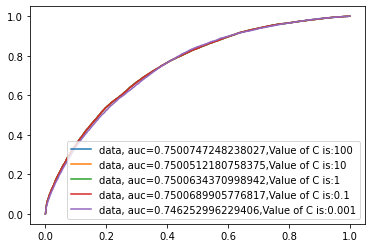

In [90]:
C = [100,10,1, .1, .001]

for c in C:
       # initiating model
    logreg = LogisticRegression(C=c)

    # fit model
    logreg.fit(train_x_scaled,y_train)

    # predict
    y_pred = logreg.predict(test_x_scaled)
    y_pred_prob = logreg.predict_proba(test_x_scaled)[:,1]
    
    fpr, tpr, _ = roc_curve(y_test,  y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr,tpr,label="data, auc="+str(auc) + "," + "Value of C is:" + str(c))
    plt.legend()
    
    
    #plot_roc_curve(y_test, y_pred_prob)
    

In [91]:
C = [100,10,1, .1]
from sklearn.model_selection import cross_val_score
def Val_score():
    '''
  takes range of n_neighbors as input
  returns Mean and Standard Deviation for each value of n_neighbors
  '''
    avg = []
    std = []
    
    C = [100,10,1, .1]
  
    for c in C:
    
    # 10 fold cross validation for every value of n_neighbor
      score = cross_val_score(LogisticRegression(C=c) , X = scaler.transform(x[features]), y = y, cv = 10, scoring='roc_auc')
    
    # adding mean to avg list
      avg.append(score.mean())
    
    # adding standard deviation to std list
      std.append(score.std())
    
    return avg, std

In [92]:
#predicting on test set
logreg = LogisticRegression(C=0.1)
logreg.fit(scaler.transform(x[features]),y)
y_test_prob = logreg.predict_proba(scaler.transform(test[features]))[:,1]

# writing to the output file
submission = pd.DataFrame({
        "ID": test['ID'],
        "Is_Lead": y_test_prob
    })
submission.to_csv('Final_submission_logisticTest.csv', index=False)

### KNN

In [93]:
knn = KNeighborsClassifier()
# fit model
knn.fit(train_x_mm_scaled,y_train)

# predict
y_pred = knn.predict(test_x_mm_scaled)
y_pred_prob = knn.predict_proba(test_x_mm_scaled)[:,1]

print(roc_auc_score(y_test, y_pred_prob))

0.7099894841797573


In [94]:
def Elbow(K):
    #initiating empty list
    test_error = []
   
    #training model for evey value of K
    for i in K:
        knn = KNeighborsClassifier(i)
        # fit model
        knn.fit(train_x_mm_scaled,y_train)

        # predict
        y_pred = knn.predict(test_x_mm_scaled)
        y_pred_prob = knn.predict_proba(test_x_mm_scaled)[:,1]

        score = roc_auc_score(y_test, y_pred_prob)
        
        error = 1-score
        test_error.append(error)
    
    return test_error

In [95]:
#Defining K range
#k = range(60, 90, 5)

In [96]:
# calling above defined function
#test_error = Elbow(k)

In [97]:
# plotting the Curves
#plt.plot(k, test_error)
#plt.xlabel('K Neighbors')
#plt.ylabel('Test error')
#plt.title('Elbow Curve for test')

In [98]:
knn = KNeighborsClassifier(n_neighbors=76)
# fit model
knn.fit(train_x_scaled,y_train)

# predict
y_pred = knn.predict(test_x_scaled)
y_pred_prob = knn.predict_proba(test_x_scaled)[:,1]

print(roc_auc_score(y_test, y_pred_prob))

0.7709132406594039


In [99]:
test_x_scaled.head()

,Age,Region_Code,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Entrepreneur,Other,Salaried,...,"binned_age_(50, 75]","binned_age_(75, 100]","binned_vintage_(0, 25]","binned_vintage_(25, 50]","binned_vintage_(50, 75]","binned_vintage_(75, 100]",Avg_Spend,c,c1,Rank_c1
0,2.167046,-0.921981,-1.365221,1.393667,0.642686,1.106562,-1.255699,-0.104263,1.582139,-0.643895,...,-0.63245,5.177716,-0.735227,-0.615736,-0.411576,2.385761,-0.353452,1.308219,-0.124317,-0.154931
1,0.144712,-0.691953,-0.215887,-1.018533,-1.555970,-0.055651,-1.255699,-0.104263,-0.632056,-0.643895,...,-0.63245,-0.193135,1.360123,-0.615736,-0.411576,-0.419153,1.077036,0.258150,1.334317,1.413583
2,0.009890,-0.921981,-1.365221,0.311269,-1.555970,-0.226474,0.796369,-0.104263,-0.632056,-0.643895,...,-0.63245,-0.193135,-0.735227,-0.615736,2.429683,-0.419153,-0.513731,0.024480,-0.500126,-0.633952
3,0.414357,0.228161,-0.215887,-0.090764,0.642686,0.193475,-1.255699,-0.104263,-0.632056,-0.643895,...,-0.63245,-0.193135,-0.735227,1.624072,-0.411576,-0.419153,-0.173784,0.547759,0.190766,0.263823
4,0.346946,-0.576939,-1.365221,0.280344,0.642686,0.264857,0.796369,-0.104263,-0.632056,-0.643895,...,-0.63245,-0.193135,-0.735227,-0.615736,2.429683,-0.419153,-0.310139,0.621981,-0.040346,-0.044837


In [100]:
test_pred = scaler.transform(test[features])
test_pred = pd.DataFrame(test_pred, columns=cols)
test_pred.head()

,Age,Region_Code,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Entrepreneur,Other,Salaried,...,"binned_age_(50, 75]","binned_age_(75, 100]","binned_vintage_(0, 25]","binned_vintage_(25, 50]","binned_vintage_(50, 75]","binned_vintage_(75, 100]",Avg_Spend,c,c1,Rank_c1
0,-1.001277,-0.691953,0.933446,-0.678351,-1.555970,-0.451299,0.796369,-0.104263,1.582139,-0.643895,...,-0.63245,-0.193135,1.360123,-0.615736,-0.411576,-0.419153,-0.165164,0.206567,0.203965,-0.872202
1,-0.057521,-0.921981,-0.215887,0.063864,0.642686,-0.236454,0.796369,-0.104263,1.582139,-0.643895,...,-0.63245,-0.193135,-0.735227,1.624072,-0.411576,-0.419153,-0.448205,-0.738422,-0.331854,-1.172254
2,-0.866454,-0.116882,0.933446,-1.018533,0.642686,-1.068743,0.796369,-0.104263,-0.632056,1.553048,...,-0.63245,-0.193135,1.360123,-0.615736,-0.411576,-0.419153,-0.538925,0.771428,-0.571768,-1.299253
3,-1.001277,0.573204,0.933446,-0.430946,0.642686,-0.303859,0.796369,-0.104263,1.582139,-0.643895,...,-0.63245,-0.193135,-0.735227,1.624072,-0.411576,-0.419153,-0.253944,-1.081514,0.060419,-0.953614
4,-1.001277,-0.116882,0.933446,-0.863905,0.642686,-0.551324,0.796369,-0.104263,1.582139,-0.643895,...,-0.63245,-0.193135,1.360123,-0.615736,-0.411576,-0.419153,-0.037112,-0.059250,0.384474,-0.772729


In [101]:
#predicting on the test set

predict = knn.predict_proba(test_pred)[:,1]
#predict = knn.predict(test_x_scaled)

In [102]:
# writing to the output file
submission = pd.DataFrame({
        "ID": test['ID'],
        "Is_Lead":predict
    })
submission.to_csv('Final_submission_knn4.csv', index=False)

In [112]:
'''Main'''
import numpy as np
import pandas as pd
import os

'''Data Viz'''
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

'''Data Prep'''
from sklearn import preprocessing as pp 
from scipy.stats import pearsonr 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import log_loss 
from sklearn.metrics import precision_recall_curve, average_precision_score 
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report 

'''Algos'''
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

In [104]:
k_fold = StratifiedKFold(n_splits=5,shuffle=True,random_state=2018)

# Logistics Regression

In [107]:
n_estimators = 10
max_features = 'auto'
max_depth = None
min_samples_split = 2
min_samples_leaf = 1
min_weight_fraction_leaf = 0.0
max_leaf_nodes = None
bootstrap = True
oob_score = False
n_jobs = -1
random_state = 2018
class_weight = 'balanced'

RFC = RandomForestClassifier(n_estimators=n_estimators, 
        max_features=max_features, max_depth=max_depth,
        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
        min_weight_fraction_leaf=min_weight_fraction_leaf, 
        max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap, 
        oob_score=oob_score, n_jobs=n_jobs, random_state=random_state, 
        class_weight=class_weight)

In [109]:
# fit model
RFC.fit(train_x_scaled,y_train)

# predict
y_pred = RFC.predict(test_x_scaled)
y_pred_prob = RFC.predict_proba(test_x_scaled)[:,1]



print(roc_auc_score(y_test, y_pred_prob))

0.7257429078530492


# XGBoost

In [110]:
params_xGB = {
   'nthread':16, #number of cores
   'learning rate': 0.3, #range 0 to 1, default 0.3
   'gamma': 0, #range 0 to infinity, default 0 
        # increase to reduce complexity (increase bias, reduce variance)
   'max_depth': 6, #range 1 to infinity, default 6
   'min_child_weight': 1, #range 0 to infinity, default 1
   'max_delta_step': 0, #range 0 to infinity, default 0
   'subsample': 1.0, #range 0 to 1, default 1
       # subsample ratio of the training examples
   'colsample_bytree': 1.0, #range 0 to 1, default 1 
      # subsample ratio of features
   'objective':'binary:logistic',
   'num_class':1,
   'eval_metric':'logloss',
   'seed':2018,
   'silent':1
 }

In [113]:
dtrain = xgb.DMatrix(data=train_x_scaled, label=y_train)
dCV = xgb.DMatrix(data=X_cv_fold)
    
bst = xgb.cv(params_xGB, dtrain, num_boost_round=2000, 
             nfold=5, early_stopping_rounds=200, verbose_eval=50)
    
best_rounds = np.argmin(bst['test-logloss-mean'])
bst = xgb.train(params_xGB, dtrain, best_rounds)

ValueError: feature_names must be string, and may not contain [, ] or <